<a href="https://colab.research.google.com/github/antoniocruzds/Web-Scraping/blob/master/Mentiras_de_Trump.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEB SCRAPING - MENTIRAS DE TRUMP
Este projeto visa raspar alguns dados existentes em um artigo de 2017 do New York Times a respeito de mentiras ditas pelo então presidente dos Estados Unidos. 

As bibliotecas utilizadas são:


*  Requests
*  Beautiful Soup
*  Pandas
---

A raspagem de dados consiste na obtenção de dados de determinada pagina. aqui iremos raspar através do HTML e para isso precisamos entender melhor a pagina em que se encontra o artigo.

Artigo -> https://www.nytimes.com/interactive/2017/06/23/opinion/trumps-lies.html?mtrref=www.youtube.com&assetType=REGIWALL


## O Artigo:
Inicialmente iremos examinar como o artigo nos é apresentado.

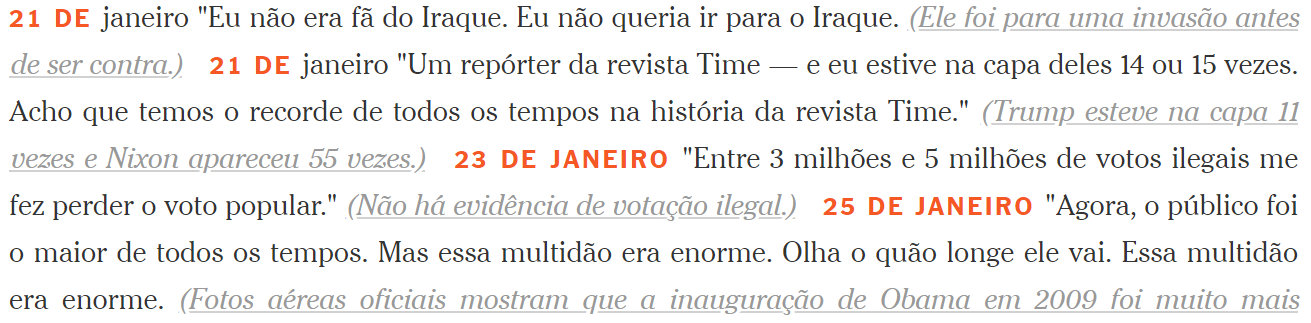

A pagina está traduzida, mas podemos notar que o artigo pode ser dividido em 4 partes: 

1.   Data;
2.   A Mentira dita;
3.   A comprovação da mentira;
4.   Link para ver melhor a comprovação; (o link está vinculado a comprovação, basta clicar em cima)


 Certamente cada um deles tem uma formatação diferente que facilitará sua extração pelo HTML, agora iremos examinar o HTML



## O HTML:
Abrindo o código fonte da pagina, podemos encontrar as informações em HTML.

Logo de cara nos deparamos com bastante informação, o que pode ser um pouco confuso. Para facilitar iremos fazer uma busca com as palavras presentes na primeira mentira dita por Trump sobre o iraque. 
    *obs: como o artio está traduzido seu html estará na linguagem original, logo pesquisaremos por iraq.*

   O resultado é:
   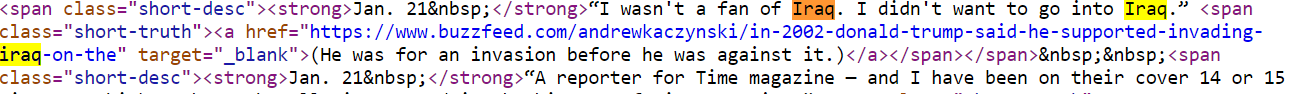

Entendendo o HTML:

1. Tags: podemos ver que existem tags presentes no texto. a (<strong  indica onde o texto ficará em negrito);
2. Atributos: as tags podem ter atributos (<span class="short-desc");
3. links: (href's) indicam link;

Para melhorar o entendimento da separação destaquei as partes na imagem:
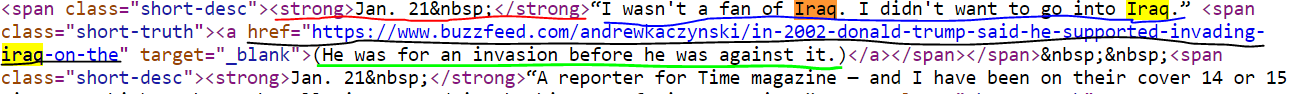

* Sublinhado em vermelho -> Data
* Sublinhado em azul -> A mentira
* Sublinhado em preto -> Link para a comprovação da mentira
* Sublinhado em verde -> O titulo da comprovação da mentira

visto isso, vamos começar a raspagem

In [4]:
#Importando a biblioteca request
import requests

#Raspando e Armazenando os dados no objeto pag
pag = requests.get('https://www.nytimes.com/interactive/2017/06/23/opinion/trumps-lies.html')

In [6]:
#Mostrando a resposta obtida
pag.text

'<!DOCTYPE html>\n<!--[if (gt IE 9)|!(IE)]> <!--><html lang="en" class="no-js page-interactive section-opinion page-theme-standard tone-opinion page-interactive-default limit-small layout-xlarge app-interactive" itemid="https://www.nytimes.com/interactive/2017/06/23/opinion/trumps-lies.html" itemtype="http://schema.org/NewsArticle" itemscope xmlns:og="http://opengraphprotocol.org/schema/"><!--<![endif]-->\n<!--[if IE 9]> <html lang="en" class="no-js ie9 lt-ie10 page-interactive section-opinion page-theme-standard tone-opinion page-interactive-default limit-small layout-xlarge app-interactive" xmlns:og="http://opengraphprotocol.org/schema/"> <![endif]-->\n<!--[if IE 8]> <html lang="en" class="no-js ie8 lt-ie10 lt-ie9 page-interactive section-opinion page-theme-standard tone-opinion page-interactive-default limit-small layout-xlarge app-interactive" xmlns:og="http://opengraphprotocol.org/schema/"> <![endif]-->\n<!--[if (lt IE 8)]> <html lang="en" class="no-js lt-ie10 lt-ie9 lt-ie8 page-i

Agora que já estamos com o html armazenado localmente, precisamos trabalhar com ele, e pra isso usaremos o Beautiful Soup.

In [7]:
#Importando o Beautiful Soup
from bs4 import BeautifulSoup

In [9]:
#Convertendo os dados presentes em 'pag' para um objeto 'sopa' de Beautiful Soup
sopa = BeautifulSoup(pag.text, 'html.parser')

Basicamente o HTML apresenta as informações da seguinte forma:

```
span class="short-desc"><strong> DATA </strong> MENTIRA <span class="short-truth"><a href="LINK"> EXPLICAÇÃO </a></span></span>
```
Também devemos destacar que as informações estão em seguencia.
Agora vamos pedir ao Soup que nos entregue as informações que queremos:



In [11]:
#Obtendo os resultados que estão dentro do span class
resultados = sopa.find_all('span', attrs={'class':'short-desc'})

In [12]:
#Lendo a quantidade de resultados obtidos

len(resultados)

180

In [14]:
#Agora vamos examinar alguns resultados obtidos
resultados[0:3]

[<span class="short-desc"><strong>Jan. 21 </strong>“I wasn't a fan of Iraq. I didn't want to go into Iraq.” <span class="short-truth"><a href="https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the" target="_blank">(He was for an invasion before he was against it.)</a></span></span>,
 <span class="short-desc"><strong>Jan. 21 </strong>“A reporter for Time magazine — and I have been on their cover 14 or 15 times. I think we have the all-time record in the history of Time magazine.” <span class="short-truth"><a href="http://nation.time.com/2013/11/06/10-things-you-didnt-know-about-time/" target="_blank">(Trump was on the cover 11 times and Nixon appeared 55 times.)</a></span></span>,
 <span class="short-desc"><strong>Jan. 23 </strong>“Between 3 million and 5 million illegal votes caused me to lose the popular vote.” <span class="short-truth"><a href="https://www.nytimes.com/2017/01/23/us/politics/donald-trump-congress-democrats.html" target="_

Aparentemente conseguimos o que queriamos, para conferir vamos pegar as ultimas linhas

In [15]:
#Pegando as 5 ultimas linhas dos resultados:
resultados[175:180]

[<span class="short-desc"><strong>Oct. 25 </strong>“We have trade deficits with almost everybody.” <span class="short-truth"><a href="https://www.bea.gov/newsreleases/international/trade/2017/trad0917.htm" target="_blank">(We have trade surpluses with more than 100 countries.)</a></span></span>,
 <span class="short-desc"><strong>Oct. 27 </strong>“Wacky &amp; totally unhinged Tom Steyer, who has been fighting me and my Make America Great Again agenda from beginning, never wins elections!” <span class="short-truth"><a href="https://www.opensecrets.org/donor-lookup/results?name=Thomas+Steyer" target="_blank">(Steyer has financially supported many winning candidates.)</a></span></span>,
 <span class="short-desc"><strong>Nov. 1 </strong>“Again, we're the highest-taxed nation, just about, in the world.” <span class="short-truth"><a href="http://www.politifact.com/truth-o-meter/statements/2016/may/08/donald-trump/donald-trump-us-not-highest-taxed-nation-in-world/" target="_blank">(We're not.)

Agora sim, tudo ok. mas ainda precisamos separar as informações.

## Separando as informações
Vamos começar com uma unica linha dos resultados:

###DATA:

In [17]:
#Criando uma nova variavel pra armazenar a primeira mentira
mentira1 = resultados[0]
#Mostrando
mentira1

<span class="short-desc"><strong>Jan. 21 </strong>“I wasn't a fan of Iraq. I didn't want to go into Iraq.” <span class="short-truth"><a href="https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the" target="_blank">(He was for an invasion before he was against it.)</a></span></span>

Podemos tentar separar procurando partes especificas.

Podemos ver que a data está em negrito, ou seja, entre STRONG. vamos dar unm find nisso

In [18]:
#Encontrando strong
mentira1.find('strong')

<strong>Jan. 21 </strong>

para melhorar a informação colocaremos o ano


In [21]:
#Colocando ano
mentira1.find('strong').text + ', 2017'

'Jan. 21\xa0, 2017'

precisamos tirar a parte \xa0 que por agora não importa pra gente

In [23]:
#Removendo o \xa0 e adcionando o ano

mentira1.find('strong').text[0:-1] + ', 2017'

'Jan. 21, 2017'

### MENTIRA

In [24]:
mentira1

<span class="short-desc"><strong>Jan. 21 </strong>“I wasn't a fan of Iraq. I didn't want to go into Iraq.” <span class="short-truth"><a href="https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the" target="_blank">(He was for an invasion before he was against it.)</a></span></span>

Infelizmente a frase não possui uma tag de abertura e fechamento, logo temos que usar outra tecnica

In [25]:
#Analisando melhor
mentira1.contents

[<strong>Jan. 21 </strong>,
 "“I wasn't a fan of Iraq. I didn't want to go into Iraq.” ",
 <span class="short-truth"><a href="https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the" target="_blank">(He was for an invasion before he was against it.)</a></span>]

Aqui percebemos que a mentira está aninhada dentro de uma tag, podemos usar isso para separa-lá:


In [26]:
#Selecionando a linha que queremos
mentira1.contents[1]

"“I wasn't a fan of Iraq. I didn't want to go into Iraq.” "

In [27]:
#Removendo aspas e espaços extras
mentira1.contents[1][1:-2]

"I wasn't a fan of Iraq. I didn't want to go into Iraq."

### COMPROVAÇÃO DA MENTIRA E O LINK

In [28]:
mentira1

<span class="short-desc"><strong>Jan. 21 </strong>“I wasn't a fan of Iraq. I didn't want to go into Iraq.” <span class="short-truth"><a href="https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the" target="_blank">(He was for an invasion before he was against it.)</a></span></span>

Aqui podemos notar que a explicação está dentro de uma tag 'a', logo procuraremos por 'a' e pegaremos a ultima parte, pois a primeira é o link em href

In [30]:
#Selecionando a comprovação
mentira1.find('a').text[1:-1]

'He was for an invasion before he was against it.'

In [33]:
#Selecionando o Link(Href)
mentira1.find('a')['href']


'https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the'

Prontinho. 

Agora que já sabemos como obter as informações, vamos fazer um loop para repetir nas outras mentiras e depois armazena-las em tuplas chamadas de 'Falas'.

## Construindo o DataSet com as Informações

In [41]:
#Crinado uma lista
falas = []

#Repetindo o processo em todas as mentiras e armazenando na lista de falas
for result in resultados:
    DATA = result.find('strong').text[0:-1] + ', 2017'
    MENTIRA = result.contents[1][1:-2]
    COMPROVAÇÃO = result.find('a').text[1:-1]
    URL = result.find('a')['href']
    falas.append((DATA, MENTIRA, COMPROVAÇÃO, URL))

In [42]:
#Contando quantas entiras tem
len(falas)

180

In [43]:
#vendo as primeiras linhas
falas[0:3]

[('Jan. 21, 2017',
  "I wasn't a fan of Iraq. I didn't want to go into Iraq.",
  'He was for an invasion before he was against it.',
  'https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the'),
 ('Jan. 21, 2017',
  'A reporter for Time magazine — and I have been on their cover 14 or 15 times. I think we have the all-time record in the history of Time magazine.',
  'Trump was on the cover 11 times and Nixon appeared 55 times.',
  'http://nation.time.com/2013/11/06/10-things-you-didnt-know-about-time/'),
 ('Jan. 23, 2017',
  'Between 3 million and 5 million illegal votes caused me to lose the popular vote.',
  "There's no evidence of illegal voting.",
  'https://www.nytimes.com/2017/01/23/us/politics/donald-trump-congress-democrats.html')]

Agora vamos armasenar em um dataframe para melhorar a visualização. usaremos o pandas para isso:


In [38]:
#Importando o pandas
import pandas as pd

In [44]:
#Criando o df, e armazenando os dados da lista
df = pd.DataFrame(falas, columns=['DATA', 'MENTIRA', 'EXPLICAÇÃO', 'URL'])

#Mostrando o começo do df
df.head()

,DATA,MENTIRA,EXPLICAÇÃO,URL
0,"Jan. 21, 2017",I wasn't a fan of Iraq. I didn't want to go in...,He was for an invasion before he was against it.,https://www.buzzfeed.com/andrewkaczynski/in-20...
1,"Jan. 21, 2017",A reporter for Time magazine — and I have been...,Trump was on the cover 11 times and Nixon appe...,http://nation.time.com/2013/11/06/10-things-yo...
2,"Jan. 23, 2017",Between 3 million and 5 million illegal votes ...,There's no evidence of illegal voting.,https://www.nytimes.com/2017/01/23/us/politics...
3,"Jan. 25, 2017","Now, the audience was the biggest ever. But th...",Official aerial photos show Obama's 2009 inaug...,https://www.nytimes.com/2017/01/21/us/politics...
4,"Jan. 25, 2017",Take a look at the Pew reports (which show vot...,The report never mentioned voter fraud.,https://www.nytimes.com/2017/01/24/us/politics...


In [46]:
#mostrando o final do df
df.tail()

,DATA,MENTIRA,EXPLICAÇÃO,URL
175,"Oct. 25, 2017",We have trade deficits with almost everybody.,We have trade surpluses with more than 100 cou...,https://www.bea.gov/newsreleases/international...
176,"Oct. 27, 2017","Wacky & totally unhinged Tom Steyer, who has b...",Steyer has financially supported many winning ...,https://www.opensecrets.org/donor-lookup/resul...
177,"Nov. 1, 2017","Again, we're the highest-taxed nation, just ab...",We're not.,http://www.politifact.com/truth-o-meter/statem...
178,"Nov. 7, 2017",When you look at the city with the strongest g...,"Several other cities, including New York and L...",http://www.politifact.com/truth-o-meter/statem...
179,"Nov. 11, 2017","I'd rather have him – you know, work with him...","There is no evidence that Democrats ""set up"" R...",https://www.nytimes.com/interactive/2017/12/10...


vamos só melhorar a formatação da data 

In [47]:
#Arrumando a dada
df['DATA'] = pd.to_datetime(df['DATA'])

In [48]:
#Verificando no começo do df
df.head()

,DATA,MENTIRA,EXPLICAÇÃO,URL
0,2017-01-21,I wasn't a fan of Iraq. I didn't want to go in...,He was for an invasion before he was against it.,https://www.buzzfeed.com/andrewkaczynski/in-20...
1,2017-01-21,A reporter for Time magazine — and I have been...,Trump was on the cover 11 times and Nixon appe...,http://nation.time.com/2013/11/06/10-things-yo...
2,2017-01-23,Between 3 million and 5 million illegal votes ...,There's no evidence of illegal voting.,https://www.nytimes.com/2017/01/23/us/politics...
3,2017-01-25,"Now, the audience was the biggest ever. But th...",Official aerial photos show Obama's 2009 inaug...,https://www.nytimes.com/2017/01/21/us/politics...
4,2017-01-25,Take a look at the Pew reports (which show vot...,The report never mentioned voter fraud.,https://www.nytimes.com/2017/01/24/us/politics...


Prontinho, fizemos o que queriamos. Agora é só fazer a exportação desse df em formato CSV para futuras análises.

## Exportando o DataSet em formato de CSV

In [49]:
#Exportando com o nome Mentiras de Trump
df.to_csv('Mentiras_de_Trump.csv', index=False, encoding='utf-8')

In [52]:
df = pd.read_csv('Mentiras_de_Trump.csv', parse_dates=['DATA'], encoding='utf-8')